# Climate Bet 
Using time-series model, SARIMA to forecast the climate from year 2008 
The data used is from MET and NASA website



-------------------------------------------------------------------------------------------------------

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.7MB/s 
     |████████████████████████████████| 2.1MB 31.7MB/s 
     |████████████████████████████████| 8.7MB 54.2MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import datetime
import pmdarima as pm

In [ ]:
### Import the dataset  ### 
df_met = pd.read_csv("MET_Data.csv")
df_nasa = pd.read_csv("NASA_pivoted_longer.csv")

In [ ]:
### NASA Dataset Cleanup 
df_nasa.loc[:,'time'] = pd.to_datetime(df_nasa.loc[:,'time'])
df_nasa.sort_values(by='time', inplace=True)
nasa_temp = pd.DataFrame(df_nasa.loc[:, 'temp'])
nasa_temp.index = df_nasa.time

In [ ]:
### MET Dataset cleanup
df_met.loc[:,'time'] = pd.to_datetime(df_met.loc[:,'time'])
met = df_met.groupby(by=['time']).temperature_anomaly.mean()
met_temp = pd.DataFrame(met.values, columns=['temp'], index = met.index)
met_temp = met_temp + 14

**Global Average temperature plot**

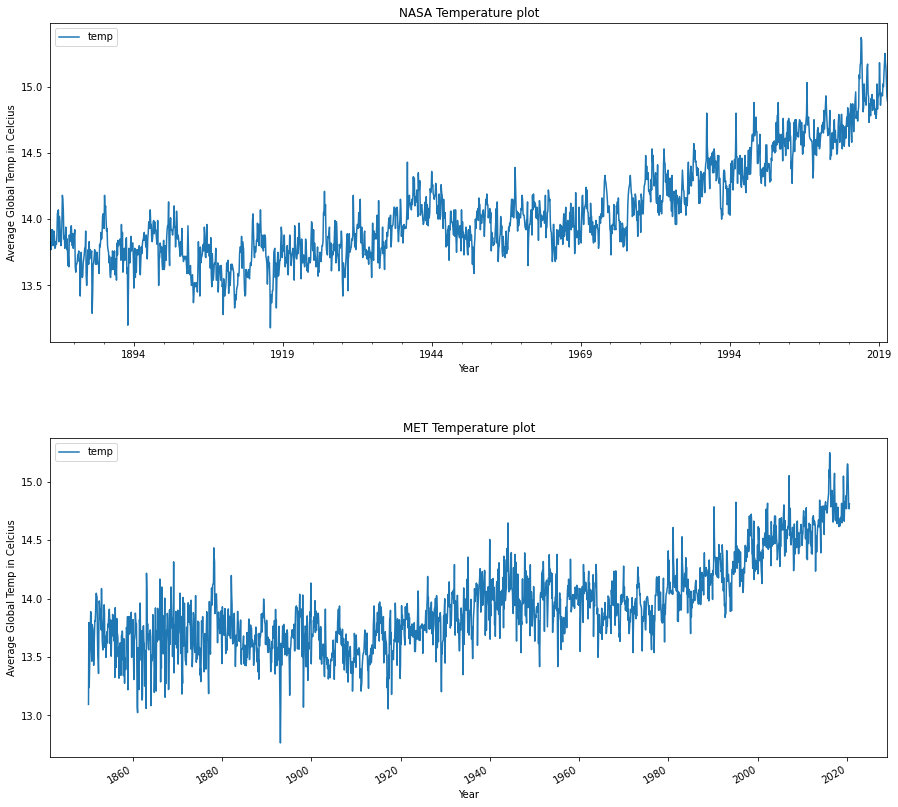

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

## Plot NASA data
nasa_temp.plot(figsize=(15,15), ax=ax1)
ax1.set_title("NASA Temperature plot")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Global Temp in Celcius")

## Plot the MET Data
met_temp.plot(figsize=(15,15), ax=ax2)
ax2.set_title("MET Temperature plot")
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Global Temp in Celcius")

plt.subplots_adjust(hspace=0.3)
plt.show()


# Prediction from 2008 to 2017 


In [ ]:
# Take Average temperature of the year 2007 and forecast the average as the temperature from 2008-2017

## NASA Dataset
avg_temp = nasa_temp.loc[nasa_temp.index.year==2007, 'temp'].mean()
nasa_temp = nasa_temp.loc[nasa_temp.index.year<=2017,:]
nasa_temp.loc[:,'forecasttemp'] = np.where((nasa_temp.index.year>=2008) & (nasa_temp.index.year<=2017) ,\
                                             avg_temp,np.nan)

## MET Dataset
avg_temp2 = met_temp.loc[met_temp.index.year==2007, 'temp'].mean()
met_temp = met_temp.loc[met_temp.index.year<=2017,:]
met_temp.loc[:,'forecasttemp'] = np.where((met_temp.index.year>=2008) & (met_temp.index.year<=2017) ,\
                                             avg_temp2,np.nan)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


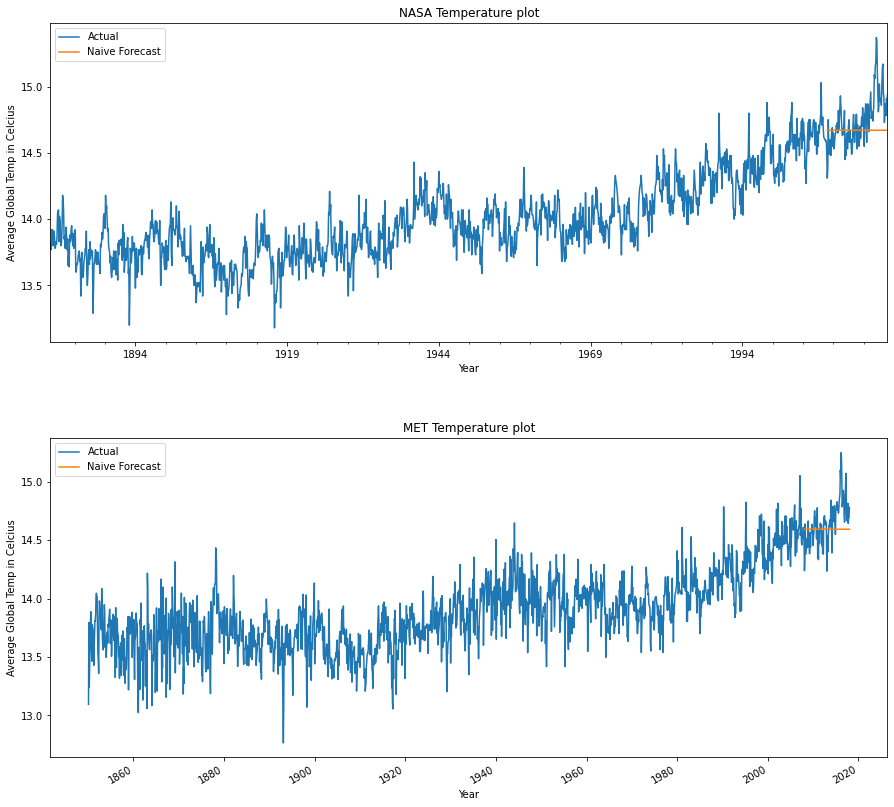

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

## Plot NASA data Naive forecast
nasa_temp.plot(figsize=(15,15), ax=ax1)
ax1.set_title("NASA Temperature plot")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Global Temp in Celcius")
ax1.legend(['Actual', 'Naive Forecast'])

## Plot the MET data Naive forecast
met_temp.plot(figsize=(15,15), ax=ax2)
ax2.set_title("MET Temperature plot")
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Global Temp in Celcius")
ax2.legend(['Actual', 'Naive Forecast'])

plt.subplots_adjust(hspace=0.3)
plt.show()

# SARIMA model

In [ ]:
# take remove the data beyond year 2007 
avgtemp_nasa = nasa_temp.loc[nasa_temp.index.year<2008, 'temp']
avgtemp_met = met_temp.loc[met_temp.index.year<2008, 'temp']

In [ ]:
# Model on NASA dataset
model_sarima_nasa = pm.auto_arima(avgtemp_nasa, seasonal=True, m=12, trend='ct', transparams=True,
                             start_p=1, start_q=1, start_d=1,
                             start_P=1, start_Q=1, start_D=1,
                             max_p=13, max_q=13, max_d=13, 
                             max_D=13, max_P=13, max_Q=13, 
                             max_order=13, maxiter=300, 
                             error_action='ignore',  suppress_warnings=True)

In [ ]:
# Model on MET dataset
model_sarima_met = pm.auto_arima(avgtemp_met, seasonal=True, m=12, trend='ct', transparams=True,
                             start_p=1, start_q=1, start_d=1,
                             start_P=1, start_Q=1, start_D=1,
                             max_p=13, max_q=13, max_d=13, 
                             max_D=13, max_P=13, max_Q=13, 
                             max_order=13, maxiter=300, 
                             error_action='ignore',  suppress_warnings=True)

In [ ]:
# Save the trained model in pickel file
import pickle

# Save Ridge Model
pkl_filename = "sarima_nasa.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(model_sarima_nasa,file)

# Save Lasso Model
pkl_filename = "sarima_met.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(model_sarima_met,file)

In [ ]:
n_periods = 12*10
## Forecast using Sarima model NASA Datset 2008 to 2017
fitted_nasa, confint_nasa = model_sarima_nasa.predict(n_periods, return_conf_int=True)
index_of_fc = pd.date_range(avgtemp_nasa.index[-1], periods = n_periods + 1, freq='MS')[1:]

arima_fitted_nasa = pd.Series(fitted_nasa, index=index_of_fc)
arima_lower_nasa = pd.Series(confint_nasa[:, 0], index=index_of_fc)
arima_upper_nasa = pd.Series(confint_nasa[:, 1], index=index_of_fc)


## Forecast using Sarima model NASA Datset 2008 to 2017
fitted_met, confint_met = model_sarima_met.predict(n_periods, return_conf_int=True)
index_of_fc2 = pd.date_range(avgtemp_met.index[-1], periods = n_periods + 1, freq='MS')[1:]

arima_fitted_met = pd.Series(fitted_met, index=index_of_fc2)
arima_lower_met = pd.Series(confint_met[:, 0], index=index_of_fc2)
arima_upper_met = pd.Series(confint_met[:, 1], index=index_of_fc2)

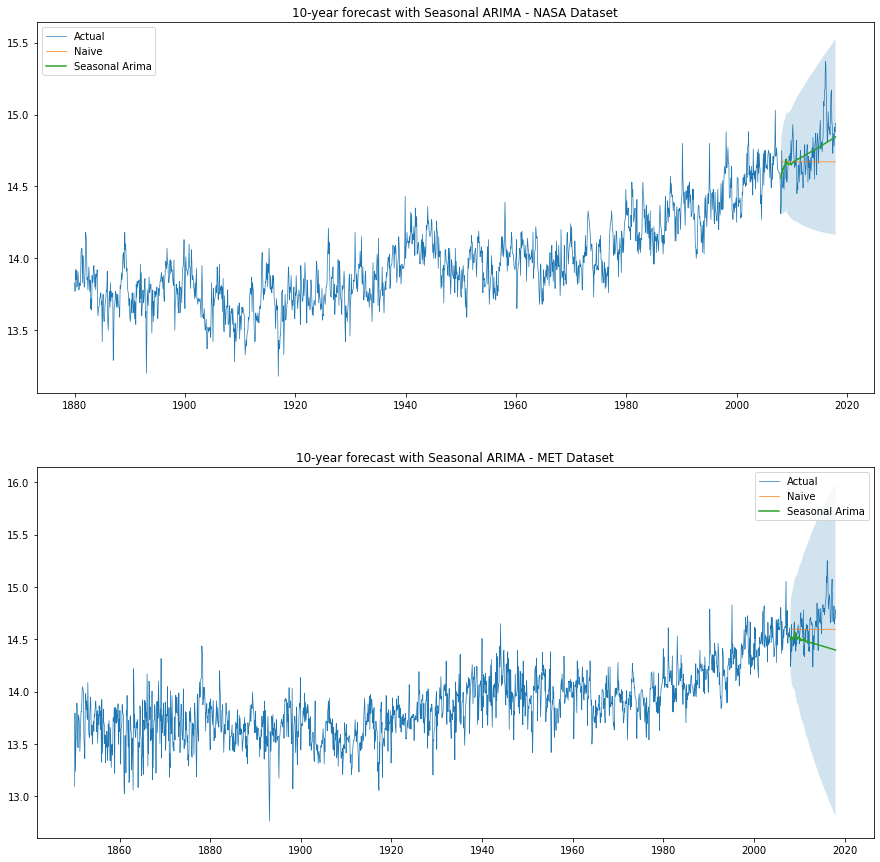

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(nasa_temp, linewidth=0.7)
ax1.plot(arima_fitted_nasa)
ax1.fill_between(arima_lower_nasa.index, 
                 arima_lower_nasa, 
                 arima_upper_nasa, 
                 alpha=.2)
ax1.legend(['Actual','Naive','Seasonal Arima'])
ax1.set_title("10-year forecast with Seasonal ARIMA - NASA Dataset")

ax2.plot(met_temp, linewidth=0.7)
ax2.plot(arima_fitted_met)
ax2.fill_between(arima_lower_met.index, 
                 arima_lower_met, 
                 arima_upper_met, 
                 alpha=.2)
ax2.legend(['Actual','Naive','Seasonal Arima'])
ax2.set_title("10-year forecast with Seasonal ARIMA - MET Dataset")
plt.show()

In [ ]:
## Forecast using Sarima model MET Datset 2008 to 2017

n_periods = 12*10
fitted, confint = model_sarima_2.predict(n_periods, return_conf_int=True)
index_of_fc = pd.date_range(avgtemp_df.index[-1], periods = n_periods + 1, freq='MS')[1:]

arima_fitted_series = pd.Series(fitted, index=index_of_fc)
arima_lower_series = pd.Series(confint[:, 0], index=index_of_fc)
arima_upper_series = pd.Series(confint[:, 1], index=index_of_fc)

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(avgtemp_df, linewidth=0.7)
ax.plot(arima_fitted_series)
ax.fill_between(arima_lower_series.index, 
                 arima_lower_series, 
                 arima_upper_series, 
                 alpha=.2)

ax.set_title("5-year forecast with Seasonal ARIMA")
fig.show()

In [ ]:
# Calculate the Mean absolute error in the 2008-2017 period forecast
from sklearn.metrics import mean_absolute_error
y_pred = climatebet_naive.loc[climatebet_naive.index.year>=2008,'forecasttemp']
y_true = climatebet_naive.loc[climatebet_naive.index.year>=2008,'Globe']

print(f"Mean absolute error is for Naive model prediction : {mean_absolute_error(y_true,y_pred):.2f}")


Mean absolute error is for Naive model prediction : 0.17


In [ ]:
###### Naive Model  10 Year Prediction #######################
# Take Average temperature of the year 1999 and forecast the average as the temperature \
## NASA Dataset 2000 to 2009 forecast
avg_temp3 = nasa_temp.loc[nasa_temp.index.year==1999, 'temp'].mean()
nasa_temp2 = nasa_temp.loc[nasa_temp.index.year<=2009,:]
nasa_temp2.loc[:,'naive10year'] = np.where((nasa_temp2.index.year>=2000) & (nasa_temp2.index.year<=2009) ,\
                                             avg_temp3,np.nan)

## MET Dataset 2000 to 2009 forecast
avg_temp4 = met_temp.loc[met_temp.index.year==1999, 'temp'].mean()
met_temp2 = met_temp.loc[met_temp.index.year<=2009,:]
met_temp2.loc[:,'naive10year'] = np.where((met_temp2.index.year>=2000) & (met_temp2.index.year<=2009) ,\
                                             avg_temp4,np.nan)
###### Naive Model  20 Year Prediction #######################
# Take Average temperature of the year 1999 and forecast the average as the temperature \
## NASA Dataset 2000 to 2009 forecast
nasa_temp3 = nasa_temp.loc[nasa_temp.index.year<=2019,:]
nasa_temp3.loc[:,'naive20year'] = np.where((nasa_temp3.index.year>=2000) & (nasa_temp3.index.year<=2019) ,\
                                             avg_temp3,np.nan)
## MET Dataset 2000 to 2009 forecast
met_temp3 = met_temp.loc[met_temp.index.year<=2019,:]
met_temp3.loc[:,'naive20year'] = np.where((met_temp3.index.year>=2000) & (met_temp3.index.year<=2019) ,\
                                             avg_temp4,np.nan)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


**10 Year Naive forecast year 2000-2009**

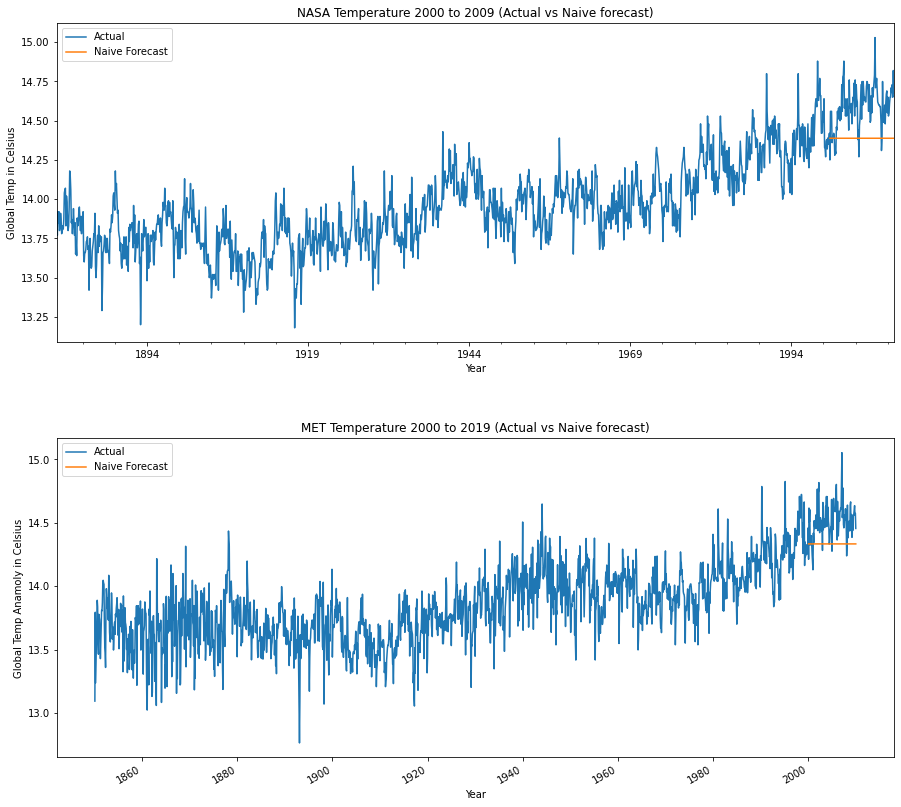

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

nasa_10yr = nasa_temp2.loc[:, ['temp','naive10year']]
met_10yr = met_temp2.loc[:, ['temp','naive10year']]

nasa_10yr.plot(figsize=(15,15), ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Global Temp in Celsius")
ax1.set_title("NASA Temperature 2000 to 2009 (Actual vs Naive forecast)")
ax1.legend(["Actual", "Naive Forecast"])

met_10yr.plot(figsize=(15,15), ax=ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("Global Temp Anamoly in Celsius")
ax2.set_title("MET Temperature 2000 to 2019 (Actual vs Naive forecast)")
ax2.legend(["Actual", "Naive Forecast"])

plt.subplots_adjust(hspace=0.3)
plt.show()


**20 Year Naive forecast year 2000-2019**

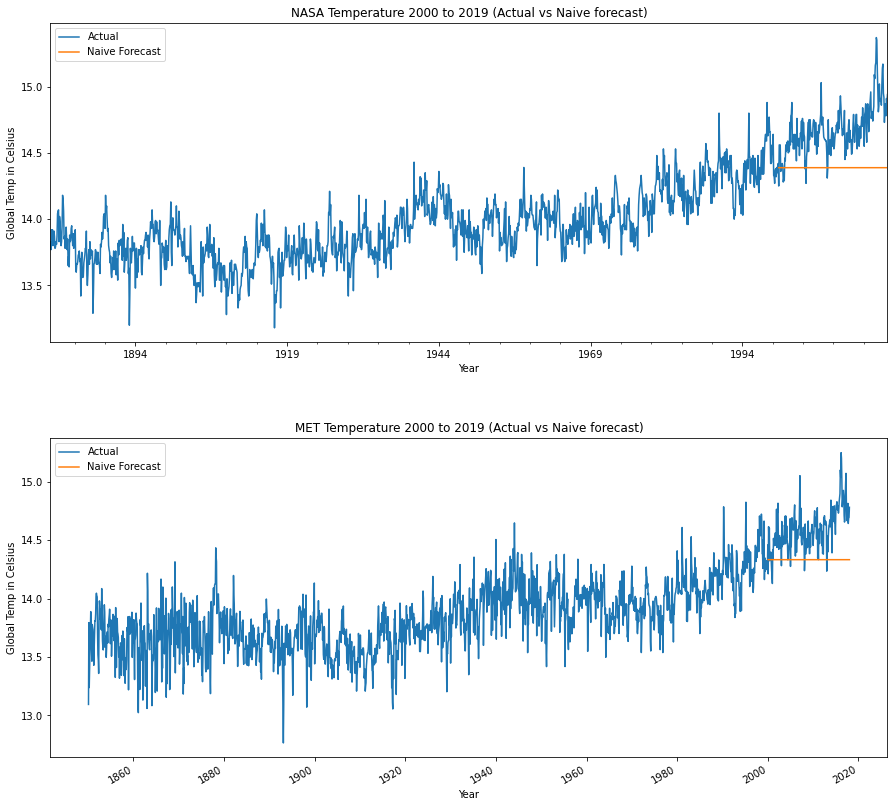

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

nasa_20yr = nasa_temp3.loc[:, ['temp','naive20year']]
met_20yr = met_temp3.loc[:, ['temp','naive20year']]

nasa_20yr.plot(figsize=(15,15), ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Global Temp in Celsius")
ax1.set_title("NASA Temperature 2000 to 2019 (Actual vs Naive forecast)")
ax1.legend(["Actual", "Naive Forecast"])

met_20yr.plot(figsize=(15,15), ax=ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("Global Temp in Celsius")
ax2.set_title("MET Temperature 2000 to 2019 (Actual vs Naive forecast)")
ax2.legend(["Actual", "Naive Forecast"])

plt.subplots_adjust(hspace=0.3)
plt.show()

**Sarima Model training**

In [ ]:
# Data before 2000
nasa_before2k = nasa_temp.loc[nasa_temp.index.year<2000, 'temp']
met_before2k = met_temp.loc[met_temp.index.year<2000, 'temp']

In [ ]:
# Model on NASA dataset before 2000
modelsarima_nasa_2k = pm.auto_arima(nasa_before2k, seasonal=True, m=12, trend='ct', transparams=True,
                             start_p=1, start_q=1, start_d=1,
                             start_P=1, start_Q=1, start_D=1,
                             max_p=13, max_q=13, max_d=13, 
                             max_D=13, max_P=13, max_Q=13, 
                             max_order=13, maxiter=300, 
                             error_action='ignore',  suppress_warnings=True)

In [ ]:
# Model on MET dataset before 2000
modelsarima_met_2k = pm.auto_arima(met_before2k, seasonal=True, m=12, trend='ct', transparams=True,
                             start_p=1, start_q=1, start_d=1,
                             start_P=1, start_Q=1, start_D=1,
                             max_p=13, max_q=13, max_d=13, 
                             max_D=13, max_P=13, max_Q=13, 
                             max_order=13, maxiter=300, 
                             error_action='ignore',  suppress_warnings=True)

In [ ]:
# Save the trained model in pickel file
import pickle

# Save Ridge Model
pkl_filename = "sarima_nasaQ7.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(modelsarima_nasa_2k,file)

# Save Lasso Model
pkl_filename = "sarima_metQ7.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(modelsarima_met_2k,file)

In [ ]:
# Calculate the Mean absolute error in the 2009-2019 period forecast
from sklearn.metrics import mean_absolute_error
y_pred_10yr = climatebet_naive2.loc[(climatebet_naive2.index.year>=2000) & (climatebet_naive2.index.year<=2009),'forecasttemp10year']
y_true_10yr = climatebet_naive2.loc[(climatebet_naive2.index.year>=2000) & (climatebet_naive2.index.year<=2009),'Globe']

y_pred_20yr = climatebet_naive2.loc[(climatebet_naive2.index.year>=2000) & (climatebet_naive2.index.year<=2019),'forecasttemp20year']
y_true_20yr = climatebet_naive2.loc[(climatebet_naive2.index.year>=2000) & (climatebet_naive2.index.year<=2019),'Globe']

print(f"Mean absolute error is for Naive model prediction(2000 to 2009) : {mean_absolute_error(y_true_10yr,y_pred_10yr):.2f}")
print(f"\nMean absolute error is for Naive model prediction(2000 to 2019) : {mean_absolute_error(y_true_20yr,y_pred_20yr):.2f}")

Mean absolute error is for Naive model prediction(2000 to 2009) : 0.16

Mean absolute error is for Naive model prediction(2000 to 2019) : 0.22
